In [1]:
#Kittipong Wangnok
#School of Physics, Institute of Science, Suranaree University of Technology
#Import module
import sys
import os
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

2022_July_week2_OC_Schwope_ephemeris.ipynb
2022_July_week2_OC_Schwope_ephemeris.pdf
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data.pdf
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data_zooming_res.pdf
interporate_lnLTT_fit_Beuermann.out
oc_dpleo_Beuermann_Schwope_Kittipong.dat
oc_dpleo_Beuermann_Schwope_Kittipong.inp
oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt


In [3]:
#Read data ---#1
Input = "oc_dpleo_Beuermann_Schwope_Kittipong.inp"
Data   = np.genfromtxt(Input)

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

#print(len(Epoch))

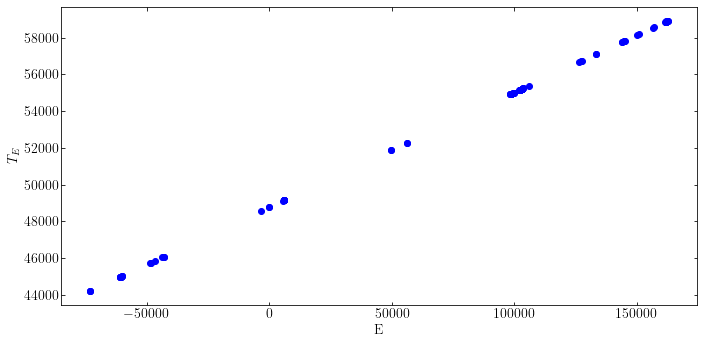

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
#print(len_x)

In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit
import scipy.optimize as optimization 

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

params, covariance = optimization.curve_fit(f = linear_fit, xdata = x, ydata = y, sigma=dy, absolute_sigma=False)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm**0.5)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc**0.5)
#print(covariance)

Slope (m) is  0.0623628498444855
The error of the slope (dm) is  7.616974447361354e-10
Intercept (c) is  48773.214187518504
The error of the intercept (dc) is  7.935949331939411e-05


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
#y_line = linear_fit(x_line, m, c)
ys = m*x + c #just only our data point
Residual = y - ys
#print(y)
#print(ys)
#print(Residual)

#np.savetxt("Linear_fit_period_year_2017KG5.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
m = 2
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
#print(Reduced_chisq)

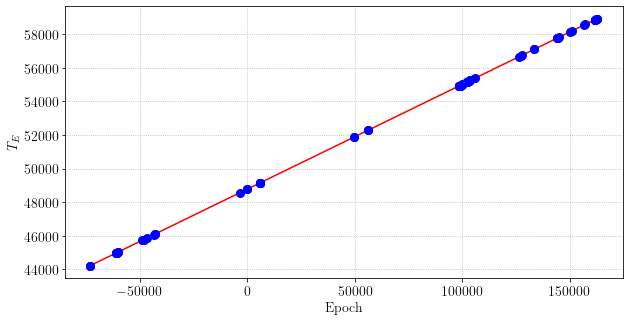

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x, ys, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

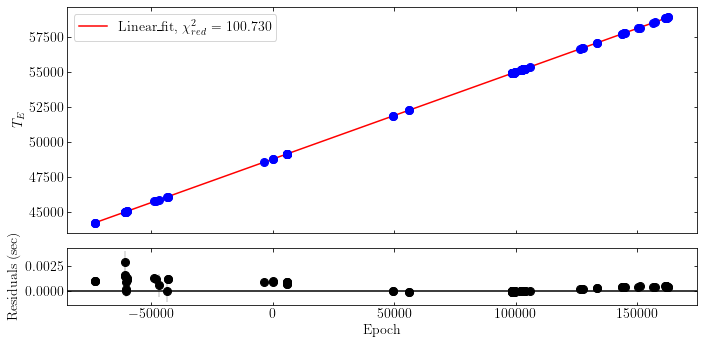

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x, ys, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("oc_linear_dpleo_Beuermann_2011_ephemeris_determination.pdf", dpi=1000)

plt.show()

### Perfrom the fitting

In [10]:
x = Epoch
c = c
m = m

#Input
t = c + m*x
y = T_obs
dy = T_obs_err

#print(len(t))
#print(t)

In [11]:
#Parameter for the fitting
P_orb = m
T0 = c
K = 33.7/(24*60*60)       
P = 10220       
e = 0.39               
w = -1.36          
tau = 53025   

In [12]:
#Function for the fitting
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def LTT(K,P,e,w,tau,t):
    f = TAno(P,tau,e,t)
    return K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

def lnLTT_fit(t,T0,P_orb,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    Epoch = (t-c)/m
    return T0 + P_orb*Epoch + LTT(K,P,e,w,tau,t)

In [13]:
#Fitting process
import scipy.optimize as optimization  
guess = (T0,P_orb,K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(lnLTT_fit, t, y,sigma=dy, absolute_sigma=False,p0=guess)

T0 = params[0]
P_orb = params[1]
K = params[2]
P = params[3]
e = params[4]
w = params[5]
tau = params[6]


dT0 = params_covariance[0,0]
dP_orb = params_covariance[1,1]
dK = params_covariance[2,2]
dP = params_covariance[3,3]
de = params_covariance[4,4]
dw = params_covariance[5,5]
dtau = params_covariance[6,6]

oc_lnLTT_fit = lnLTT_fit(t,*params)
#print(len(oc_lnLTT_fit))

print("The fitting parameters:")
print('T0 = '+str('%0.5f' %(T0)),'+/-', str('%0.5f' %(dT0**0.5)), "[days]")
print('P_bin = '+str('%0.10f' %(P_orb)),'+/-', str('%0.10f' %(dP_orb**0.5)), "[days]")
print('K_d = '+str('%0.6f' %(K)),'+/-', str('%0.6f' %(dK**0.5)), "[days]")
print('K_s = '+str('%0.1f' %(K*24*60*60)),'+/-', str('%0.1f' %((dK**0.5)*24*60*60)), "[s]")
print('P_d = '+str('%0.2f' %(P)),'+/-', str('%0.2f' %(dP**0.5)), "[days]")
print('P_yr = '+str('%0.2f' %(P/365.25)),'+/-', str('%0.2f' %((dP**0.5)/365.25)), "[years]")
print('e = '+str('%0.3f' %(e)),'+/-', str('%0.3f' %(de**0.5)), "[-]")
print('w = '+str('%0.2f' %(w)),'+/-', str('%0.2f' %(dw**0.5)), "[rad]")
print('w_deg = '+str('%0.2f' %(w*(180/np.pi))),'+/-', str('%0.2f' %(dw**0.5*(180/np.pi))), "[deg]")
print('tau = '+str('%0.0f' %(tau)),'+/-', str('%0.0f' %(dtau**0.5)), "[days]")

The fitting parameters:
T0 = 48773.21428 +/- 0.00007 [days]
P_bin = 0.0623628492 +/- 0.0000000007 [days]
K_d = 0.000139 +/- 0.000020 [days]
K_s = 12.0 +/- 1.7 [s]
P_d = 10367.48 +/- 48.31 [days]
P_yr = 28.38 +/- 0.13 [years]
e = 0.514 +/- 0.066 [-]
w = -0.63 +/- 0.08 [rad]
w_deg = -35.86 +/- 4.36 [deg]
tau = 49690 +/- 1020 [days]


In [14]:
x_min, x_max = np.amin(t), np.amax(t)
x_line = np.linspace(x_min, x_max)
y_line = lnLTT_fit(x_line, *params) #### For all interporation 
#print(y_line)
#print(ocfit)
#print(x)

print(len(x_line))

Res_lnLTT_fit = y - oc_lnLTT_fit
#np.savetxt("2022_May_week4_Beuermann_Beuermann_ephemeris_lnLTT.out", np.c_[x, Res_lnLTT_fit, dy])

#Reduced_chisqrt
n = 7
dof = len_x - n
Chi_sqr = ((y - oc_lnLTT_fit)**2/(dy)**2)/dof
Reduced_chisq_lnLTT = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_lnLTT)

50
Reduced_chisq: 84.88815642973853


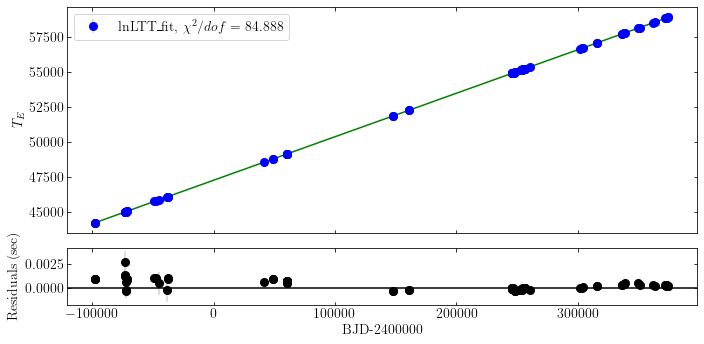

In [15]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))
#plt.xlabel('BJD')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(t, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='lnLTT\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_lnLTT)))
ax0.plot(x_line, y_line, '-', color='green')

#ax0.set_ylim(-40,60)

#ax0.set_ylabel('O-C (sec)')
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')

ax1.errorbar(t, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
ax0.legend(loc="best")
#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [16]:
#Print model
Model = lnLTT_fit(t,*params)
print(Model)

[44214.55232569 44214.61468843 44214.67705117 44968.02043561
 44968.95588028 44969.01824325 44978.99631656 44993.90105442
 44993.96341732 44994.02578022 45020.90417779 45021.90198331
 45024.8330369  45731.9653379  45763.83270765 45854.88231421
 46054.94253433 46086.93462968 46086.99699243 48560.55713305
 48773.21419947 48774.21200472 49137.91224136 49143.96146342
 49144.02382652 49144.08618963 49144.95927302 49145.02163612
 49145.08399922 49145.14636232 51870.77712973 51870.90185527
 52284.67921116 52284.74157389 54914.83231557 54914.8946784
 54916.82792606 54919.69661679 54920.75678532 54922.62767129
 54922.69003416 54922.75239703 54922.81475991 54937.78186703
 54937.84423005 54938.71731253 54938.77967557 54940.65056706
 54940.71293012 54940.77529318 54940.83765624 54941.77310223
 54941.8354653  54942.64618528 54942.77091144 54942.83327452
 54942.8956376  54943.7063577  54943.76872079 54943.83108388
 54970.64722006 54970.70958312 54993.65917133 54998.64820778
 55005.63285664 55135.971

### Perform the O-C fitting

In [17]:
#New ephemeris using Schwope's ephemeris
T0_bjd = 48773.215071
T0_bjd_err = 0.000018
P0_day = 0.06236283691
P0_day_err = 0.00000000070

In [18]:
print(T0_bjd, T0_bjd_err)
print(P0_day, P0_day_err)

48773.215071 1.8e-05
0.06236283691 7e-10


In [19]:
ls

2022_July_week2_OC_Schwope_ephemeris.ipynb
2022_July_week2_OC_Schwope_ephemeris.pdf
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data.pdf
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data_zooming_res.pdf
interporate_lnLTT_fit_Beuermann.out
oc_dpleo_Beuermann_Schwope_Kittipong.dat
oc_dpleo_Beuermann_Schwope_Kittipong.inp
oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt


In [20]:
#Please change the input file
DP_Leo_bjd = open("oc_dpleo_Beuermann_Schwope_Kittipong.dat",'r').readlines()
N_dpleo_bjd = len(DP_Leo_bjd)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("oc_dpleo_Beuermann_Schwope_Kittipong.dat"):
#for line in open("T_mid_Beuermann_Schwope.in"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [21]:
BJD_time_a = [i for i in range(N_dpleo_bjd)]
Delta_aT = [i for i in range(N_dpleo_bjd)]
Delta_aT_err = [i for i in range(N_dpleo_bjd)]
E_af = [i for i in range(N_dpleo_bjd)] #float number
E_ak = [i for i in range(N_dpleo_bjd)] #integer number
E_aj = [i for i in range(N_dpleo_bjd)] #integer number
P_aE = [i for i in range(N_dpleo_bjd)]
P_err_aE = [i for i in range(N_dpleo_bjd)]
T_aC_linear = [i for i in range(N_dpleo_bjd)]
T_aO_linear = [i for i in range(N_dpleo_bjd)]
P_aver_a = [i for i in range(N_dpleo_bjd)]
P_aver_std_a = [i for i in range(N_dpleo_bjd)]

In [22]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_bjd):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    
rerults = OC_cal
f = open('oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt', 'w')
#for upper_result in upper_result:
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	44214.553250	-234703	44214.553250	44214.554056	-69.613855	13.856981
1	44214.615620	-234702	44214.615620	44214.616419	-68.994964	13.856962
2	44214.677980	-234701	44214.677980	44214.678781	-69.240073	13.856942
3	44968.023090	-222621	44968.023090	44968.021851	107.026918	98.737786
4	44968.957120	-222606	44968.957120	44968.957294	-15.017718	98.737753
5	44969.019620	-222605	44969.019620	44969.019657	-3.166827	98.737750
6	44978.997550	-222445	44978.997550	44978.997711	-13.872271	98.737389
7	44993.900780	-222206	44993.900780	44993.902429	-142.437327	58.176372
8	44993.963280	-222205	44993.963280	44993.964791	-130.586436	58.176368
9	44994.026420	-222204	44994.026420	44994.027154	-63.439545	58.176364
10	45020.905130	-221773	45020.905130	45020.905537	-35.161535	18.674786
11	45021.902920	-221757	45021.902920	45021.903342	-36.491280	18.674598
12	45024.833860	-221710	45024.833860	45024.834396	-46.283404	58.174490
13	45731.966400	-2

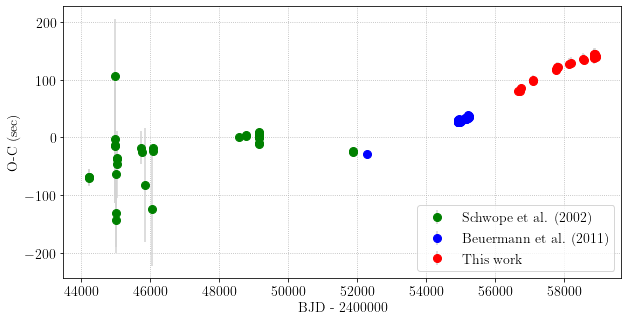

In [23]:
#Plot O-C vs BJD
InputFileInput  = 'oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt'
Data   = np.genfromtxt(InputFileInput)
BJD_time = Data[:,0]
Cycle = Data[:,1]
T_O = Data[:,2]
T_C = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

##Plotgraph
fig=plt.figure(figsize=(10, 5))
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
plt.errorbar(BJD_time[0:32], OC_s[0:32], yerr=OC_s_err[0:32], fmt='o', markersize=8, color='green', ecolor='lightgray',label='Schwope et al. (2002)')
plt.errorbar(BJD_time[33:87], OC_s[33:87], yerr=OC_s_err[33:87], fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Beuermann et al. (2011)')
plt.errorbar(BJD_time[88:112], OC_s[88:112], yerr=OC_s_err[88:112], fmt='o', markersize=8, color='red', ecolor='lightgray',label='This work')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
plt.xlabel('BJD - 2400000')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.legend(loc="best")
plt.savefig("2022_July_week2_OC_Schwope_ephemeris.pdf", dpi=1200)
plt.show()

In [24]:
x = BJD_time
Epoch = (x - T0_bjd)/P0_day 
y = OC_s
dy = OC_s_err
len_x = len(x)

#print(Epoch)

In [25]:
m = 0
c = 0
K = 33.7       #m/s
P = 10220       #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025   #days

from scipy.optimize import fsolve
from scipy.optimize import curve_fit

def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def lnLTT_fit(t,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    return K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [26]:
import scipy.optimize as optimization  
guess = (K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(lnLTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess,maxfev = 10000)


K = params[0]
P = params[1]
e = params[2]
w = params[3]
tau = params[4]


dK = params_covariance[0,0]
dP = params_covariance[1,1]
de = params_covariance[2,2]
dw = params_covariance[3,3]
dtau = params_covariance[4,4]

In [27]:
oc_lnLTT_fit = lnLTT_fit(x,*params)

#print("The fitting parameters:")
#print("dP =", m, "+/-", dm**0.5, "[s]")
#print("dT0 =", c, "+/-", dc**0.5, "[s]")
#print("T0(BJD) =", T, "+/-", dT, "[days]")
#print("P_bin =", Period, "+/-", dPeriod, "[days]")
#print("K =", K, "+/-", dK**0.5, "[s]")
#print("P_d =", P, "+/-", dP**0.5, "[days]")
#print("P_yr =", P/365.25, "+/-", (dP**0.5)/365.25, "[years]")
#print("e =", e, "+/-", de**0.5, "[-]")
#print("w =", w, "+/-", dw**0.5, "[rad]")
#print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")
#print("tau =", tau, "+/-", dtau**0.5, "[days]")

print("The fitting parameters:")
print('T0 = '+str('%0.5f' %(T0)),'+/-', str('%0.5f' %(dT0**0.5)), "[days]")
print('P_bin = '+str('%0.10f' %(P_orb)),'+/-', str('%0.10f' %(dP_orb**0.5)), "[days]")
print('K = '+str('%0.2f' %(K)),'+/-', str('%0.2f' %(dK**0.5)), "[s]")
print('P_d = '+str('%0.2f' %(P)),'+/-', str('%0.2f' %(dP**0.5)), "[days]")
print('P_yr = '+str('%0.2f' %(P/365.25)),'+/-', str('%0.2f' %((dP**0.5)/365.25)), "[years]")
print('e = '+str('%0.2f' %(e)),'+/-', str('%0.2f' %(de**0.5)), "[-]")
print('w = '+str('%0.2f' %(w)),'+/-', str('%0.2f' %(dw**0.5)), "[rad]")
print('w_deg = '+str('%0.2f' %(w*(180/np.pi))),'+/-', str('%0.2f' %(dw**0.5*(180/np.pi))), "[deg]")
print('tau = '+str('%0.0f' %(tau)),'+/-', str('%0.0f' %(dtau**0.5)), "[days]")

The fitting parameters:
T0 = 48773.21428 +/- 0.00007 [days]
P_bin = 0.0623628492 +/- 0.0000000007 [days]
K = 581.03 +/- 36.56 [s]
P_d = 219041.74 +/- 588.77 [days]
P_yr = 599.70 +/- 1.61 [years]
e = 0.99 +/- 0.00 [-]
w = -0.27 +/- 0.02 [rad]
w_deg = -15.68 +/- 1.29 [deg]
tau = 54732 +/- 24 [days]


50
Reduced_chisq: 5.398283192396455


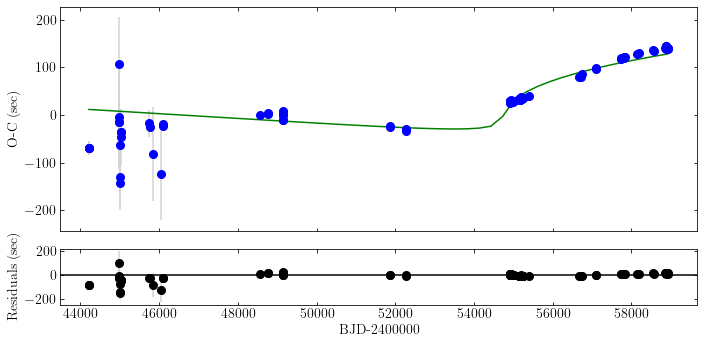

In [28]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = lnLTT_fit(x_line, *params) #### For all interporation 
#print(y_line)
#print(ocfit)
#print(x)

print(len(x_line))

#Reduced_chisqrt
n = 7
dof = len_x - n
Chi_sqr = ((y - oc_lnLTT_fit)**2/(dy)**2)/dof
Reduced_chisq_lnLTT = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_lnLTT)

N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='green')

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Res_lnLTT_fit = y-oc_lnLTT_fit

ax1.errorbar(x, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [29]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = lnLTT_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_lnLTT_fit_Beuermann.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_lnLTT_fit_Beuermann.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_lnLTT_Beuermann = Data_out[:,1]
y_range_lnLTT_Beuermann = Data_out[:,2]

#print(y_range)

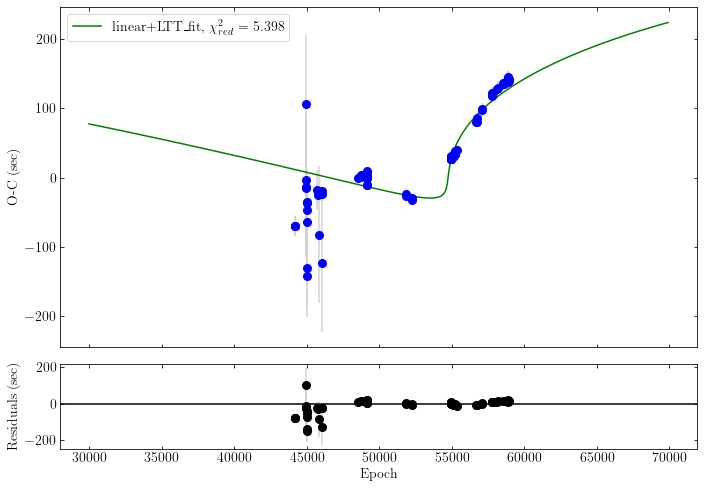

In [30]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '-', color='green',label='linear+LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_lnLTT)))
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data.pdf", dpi=1200)

plt.show()

### Zooming residual plot

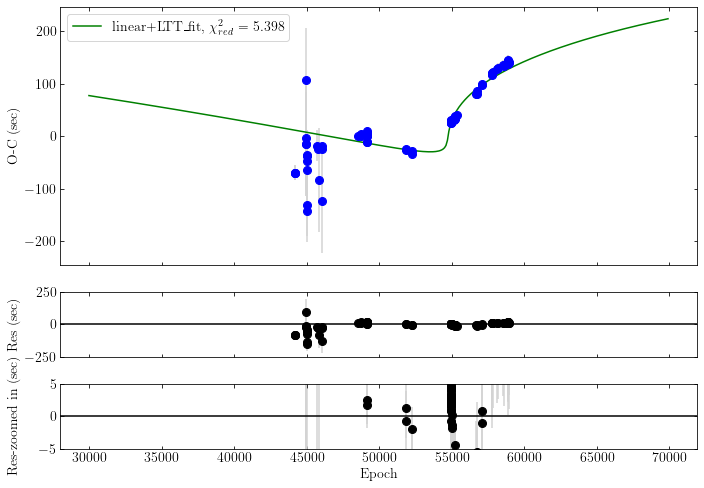

In [31]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [4, 1,1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax2.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '-', color='green',label='linear+LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_lnLTT)))
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Res (sec)')
ax2.set_ylabel('Res-zoomed in (sec)')


ax1.errorbar(x, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
ax1.set_ylim(-250,250)

ax2.errorbar(x, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax2.axhline(y=0, color='black', linestyle='-')
ax2.set_ylim(-5,5)
plt.savefig("Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data_zooming_res.pdf", dpi=1200)
fig.align_ylabels()

plt.show()